<a href="https://colab.research.google.com/github/Armandkay/ml-image-pipeline/blob/main/ml_pipeline_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/Armandkay/ml-image-pipeline/blob/main/ml_image_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Image Pipeline: Fashion-MNIST (CNN + MLOps Preparation)

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Check versions
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.18.0


## 1. Load and Preprocess Fashion-MNIST Dataset

In [2]:

# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Normalize
x_train, x_test = x_train / 255.0, x_test / 255.0

# Expand dims for CNN
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training set shape: (60000, 28, 28, 1)
Test set shape: (10000, 28, 28, 1)


## 2. Visualize Sample Images

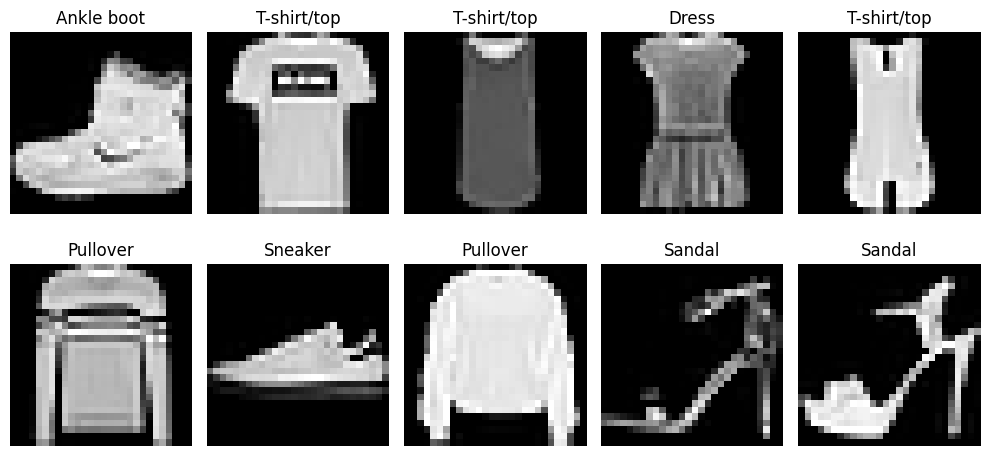

In [3]:

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i].squeeze(), cmap="gray")
    plt.title(class_names[y_train[i]])
    plt.axis("off")
plt.tight_layout()
plt.show()


## 3. Build CNN Model

In [4]:

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Train Model

In [5]:

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 45s 25ms/step - accuracy: 0.7421 - loss: 0.7067 - val_accuracy: 0.8617 - val_loss: 0.3602
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 43s 26ms/step - accuracy: 0.8705 - loss: 0.3504 - val_accuracy: 0.8867 - val_loss: 0.2950
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 25ms/step - accuracy: 0.8932 - loss: 0.2943 - val_accuracy: 0.8997 - val_loss: 0.2701
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 24ms/step - accuracy: 0.9040 - loss: 0.2592 - val_accuracy: 0.9005 - val_loss: 0.2730
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.9129 - loss: 0.2364 - val_accuracy: 0.9073 - val_loss: 0.2510
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 24ms/step - accuracy: 0.9208 - loss: 0.2174 - val_accuracy: 0.9125 - val_loss: 0.2327
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - accuracy: 0.9247 - loss: 0.2003 - val_accuracy: 0.9163 - val_loss: 0.2297
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9313 -

## 5. Evaluate Model

In [6]:

loss, acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", acc)

# Predictions & Metrics
y_pred = model.predict(x_test).argmax(axis=1)
print(classification_report(y_test, y_pred, target_names=class_names))


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9109 - loss: 0.2746
Test Accuracy: 0.9110999703407288
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.89      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.89      0.84      0.86      1000
       Dress       0.88      0.95      0.91      1000
        Coat       0.83      0.91      0.86      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.79      0.67      0.72      1000
     Sneaker       0.96      0.96      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.96      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



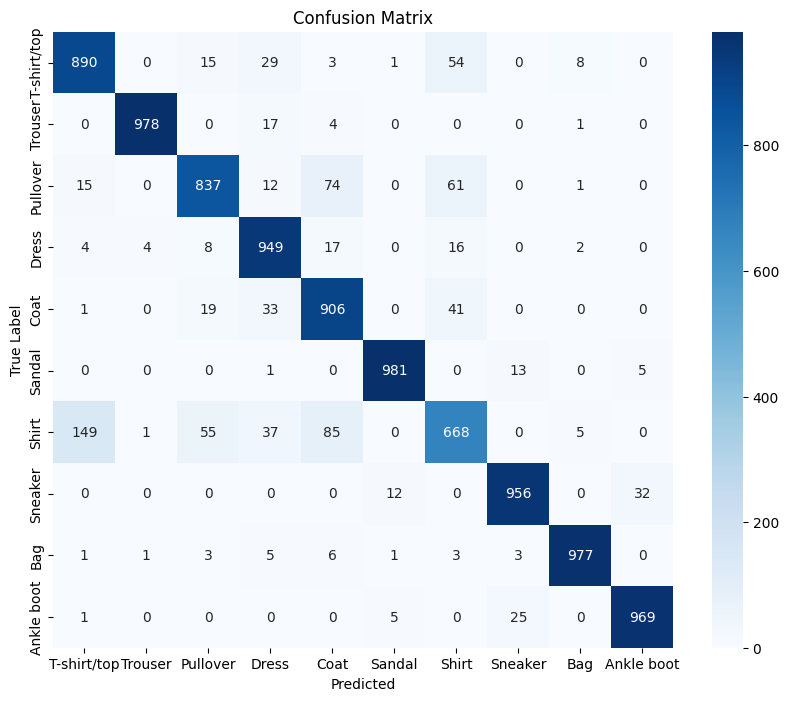

In [7]:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


## 6. Save Trained Model

In [8]:

model.save("models/model.h5")
print("Model saved to models/model.h5")


Model saved to models/model.h5


## 7. Save Sample Test Images (Optional for UI/API Testing)

In [9]:

import os
import cv2

os.makedirs("data/test/T-shirt", exist_ok=True)
count = 0
for i in range(len(x_test)):
    if y_test[i] == 0:  # Class 0 = T-shirt
        img_path = f"data/test/T-shirt/sample_{count}.png"
        cv2.imwrite(img_path, (x_test[i].squeeze() * 255).astype("uint8"))
        count += 1
    if count >= 5:
        break
print("Saved 5 sample T-shirt test images to data/test/T-shirt")


Saved 5 sample T-shirt test images to data/test/T-shirt


In [10]:
model.save("model.h5")

In [11]:
# Save the trained model
model.save("model.h5")

# Download the model to your computer (only works in Google Colab)
from google.colab import files
files.download("model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 📷 Gradio UI for Image Classification

In [12]:

# 📦 Install required packages
!pip install -q gradio tensorflow pillow

# 🔄 Load model
from tensorflow.keras.models import load_model
model = load_model("model.h5")
print("✅ Model loaded")

# 🧠 Prediction function
import numpy as np
from PIL import Image

# Replace these with your actual class names
img_height = 180
img_width = 180
class_names = ['class1', 'class2']  # TODO: update with real class labels

def predict_image(img):
    img = img.resize((img_width, img_height))
    img_array = np.expand_dims(np.array(img) / 255.0, axis=0)
    prediction = model.predict(img_array)[0]
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction)
    return f"Prediction: {predicted_class} ({confidence*100:.2f}%)"

# 🎛️ Gradio UI
import gradio as gr

interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="Image Classifier",
    description="Upload an image to get the model's prediction.",
)
interface.launch(share=True)


✅ Model loaded
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://94fd0dbcd38fcb3eb4.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Model Evaluation: F1 Score, Precision, Recall

In [22]:
test_generator = test_datagen.flow_from_directory(
    "data/test",
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=32,
    class_mode='sparse',  # for integer labels
    shuffle=False
)


Found 5 images belonging to 1 classes.


In [23]:
test_generator.reset()
pred_probs = model.predict(test_generator, verbose=1)
y_pred = np.argmax(pred_probs, axis=1)
y_true = test_generator.classes

from sklearn.metrics import classification_report
class_labels = list(test_generator.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=class_labels))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
              precision    recall  f1-score   support

     T-shirt       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



## 🔁 Gradio UI for Model Retraining

In [24]:

# 🔁 Gradio Retraining UI
import os
import shutil

def save_and_retrain(files):
    # Save uploaded images to 'data/train/' under appropriate class folders
    for file in files:
        parts = file.name.split("_")
        class_name = parts[0]  # expects filename like 'cat_001.jpg'
        class_dir = os.path.join("data/train", class_name)
        os.makedirs(class_dir, exist_ok=True)
        with open(os.path.join(class_dir, file.name), "wb") as f:
            f.write(file.read())

    # Retrain model on updated dataset (basic example)
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    datagen = ImageDataGenerator(rescale=1./255)
    train_gen = datagen.flow_from_directory("data/train", target_size=(img_height, img_width), class_mode="categorical")

    # Reuse existing model structure, just retrain
    model.fit(train_gen, epochs=3)
    model.save("model.h5")
    return "✅ Model retrained and saved!"

retrain_ui = gr.Interface(
    fn=save_and_retrain,
    inputs=gr.File(file_types=[".jpg", ".png"], file_count="multiple", label="Upload training images (prefix name with class e.g. cat_001.jpg)"),
    outputs="text",
    title="Retrain the Image Classifier",
    description="Upload new labeled images to retrain the model."
)

retrain_ui.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3a2b7e8bc04597cb49.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
